<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Survival_Analysis_Univariate_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U lifelines

     |████████████████████████████████| 337kB 4.7MB/s 
     |████████████████████████████████| 24.8MB 64.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
from lifelines.datasets import load_dd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [0]:
# Model

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [0]:
T = data["duration"]
E = data["observed"]

In [6]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

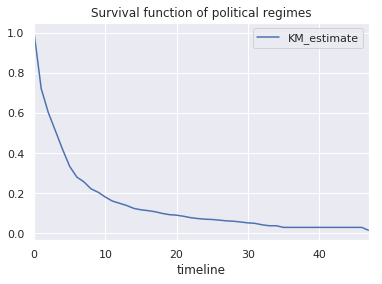

In [9]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

In [10]:
"""
How do we interpret this? 
y-axis represents the probability a leader is still around after 𝑡 years

We see that very few leaders make it past 20 years in office.
"""


kmf.confidence_interval_

,KM_estimate_upper_0.95,KM_estimate_lower_0.95
0.0,NaN,NaN
1.0,0.741841,0.700522
2.0,0.624308,0.578805
3.0,0.534126,0.487205
4.0,0.442242,0.395233
5.0,0.356952,0.311203
6.0,0.303218,0.258958
7.0,0.278769,0.235366
8.0,0.243268,0.201348
9.0,0.226095,0.184960


In [11]:
"""Median Stay"""

kmf.median_

4.0

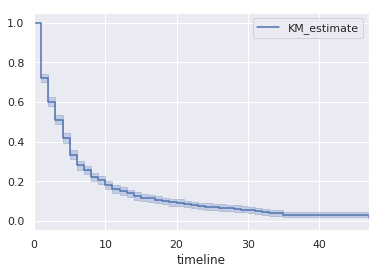

In [12]:
kmf.plot() # This mean around the world, elected leaders have a 50% chance of cessation in four years or less!

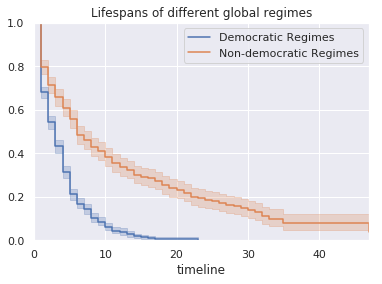

In [13]:
ax = plt.subplot(111)
dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

In [0]:
# Statistical Test 

from lifelines.statistics import logrank_test


In [0]:
"""The function logrank_test is a common statistical test in survival analysis that compares two event series’ generators. """

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)


In [16]:
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23


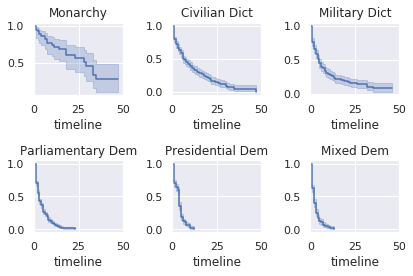

In [19]:
regime_types = data['regime'].unique()
for i, regime_type in enumerate(regime_types):
  ax = plt.subplot(2, 3, i + 1)
  
  ix = data['regime'] == regime_type
  kmf.fit(T[ix], E[ix], label=regime_type)
  kmf.plot(ax=ax, legend=False)
  
  plt.title(regime_type)
  plt.xlim(0, 50)
  
plt.tight_layout()
